In [1]:
import math
import copy
import time
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from FairDebugger import Dataset, FairnessMetric, FairnessDebuggingUsingMachineUnlearning

# Dataset class

In [2]:
class FriskDataset(Dataset):
    def __init__(self, rootTrain, rootTest):
        Dataset.__init__(self,
                         rootTrain = rootTrain,
                         rootTest = rootTest)
        self.train = self.__shiftLabelToLastColumn(self.trainDataset)
        self.test = self.__shiftLabelToLastColumn(self.testDataset)
        self.trainLattice, self.testLattice = self.__preprocessDatasetForCategorization(self.train), self.__preprocessDatasetForCategorization(self.test)
    
    def getDataset(self):
        return self.dataset, self.train, self.test
    
    def getDatasetWithNormalPreprocessing(self):
        return self.train, self.test
    
    def getDatasetWithCategorizationPreprocessing(self, decodeAttributeValues = False):
        return self.trainLattice, self.testLattice
    
    def __shiftLabelToLastColumn(self, dataset): 
        df = copy.deepcopy(dataset)
        df.drop(['inout_I', 'sex_F'], axis=1, inplace = True)
        return df[[c for c in df if c not in ['frisked']] + ['frisked']]
    
    def __preprocessDatasetForCategorization(self, dataset):
        df = copy.deepcopy(dataset)
        for col in df.columns:
            if col != 'frisked':
                df[col] = col + " = " + df[col].astype(str)
        return df
    

# Testing

In [3]:
myDataset = FriskDataset(rootTrain = 'Dataset/sqf_train.csv', rootTest = 'Dataset/sqf_test.csv')

In [4]:
fairnessDebug = FairnessDebuggingUsingMachineUnlearning(myDataset,
                                                        ["race", 1, 0],
                                                        "frisked",
                                                        FairnessMetric.EO)
print("OriginalAccuracy: " + fairnessDebug.getAccuracy() + ", originalSP: " + str(fairnessDebug.getDatasetStatisticalParity()) + ", originalPP: " + str(fairnessDebug.getDatasetPredictiveParity()) + ", originalEO: " + str(fairnessDebug.getDatasetEqualizingOddsParity()))

OriginalAccuracy: 68.36389457416148%, originalSP: 0.026610671938554736, originalPP: 0.0508912259912111, originalEO: 0.026284880721267095


level: 0
level: 1
level: 2


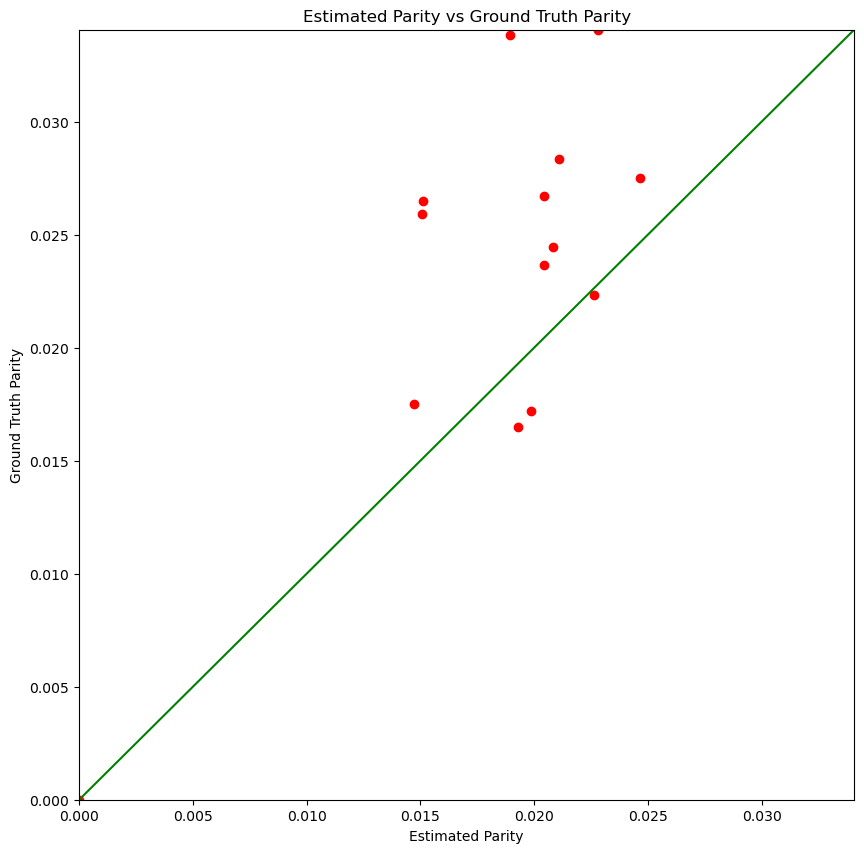

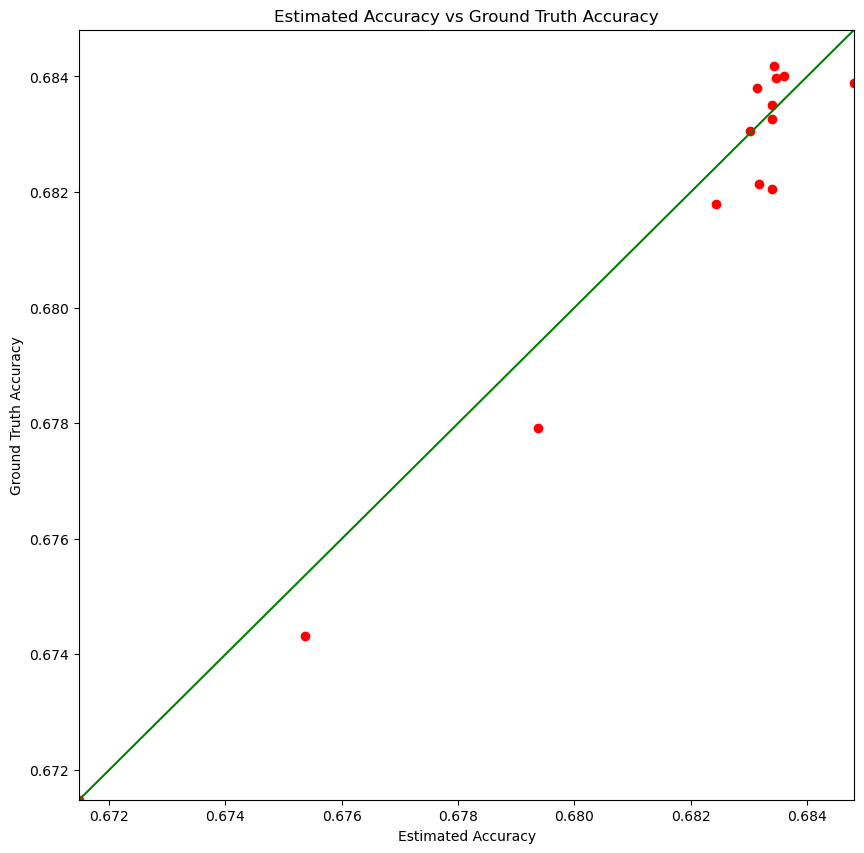

,Subset,Size,Support,Parity,GT_Parity,Accuracy,GT_Accuracy,timeElapsedToTrain,timeElapsedToDelete,Parity_Reduction,Accuracy_Reduction
0,{'sex_M = 0'},3169,0.06519905359530913,0.0,0.0,0.6714840649931081,0.6714840649931081,0.6136608123779297,3.6491496562957764,100.000000,1.7779678621616573
1,"{'build = 2', 'cs_descr = 0'}",3339,0.06869663614854439,0.014724314169185451,0.017518796424433603,0.6834300989933587,0.6841819472870807,0.5819649696350098,1.152420997619629,43.981811,0.03054927598214801
2,"{'cs_lkout = 0', 'cs_drgtr = 1'}",2921,0.060096697870589445,0.015062730370297919,0.02592152059876032,0.6848084875318491,0.6838895618395222,0.5869417190551758,1.214900016784668,42.694317,-0.17107594550009056
3,"{'weight = 0', 'cs_casng = 0'}",3132,0.06443781503960498,0.01512008215264296,0.02650490026701166,0.6793784720771897,0.6779165448393969,0.616692066192627,1.2006874084472656,42.476124,0.62320523003605
4,"{'perobs = 0.0', 'inout_O = 0'}",5999,0.12342351609916676,0.018929261715822196,0.03383326174640046,0.6833883296437074,0.6820517104548682,0.6282975673675537,3.088974952697754,27.984221,0.03665913117858736
5,{'weight = 0'},3795,0.07807838699722251,0.019287052984463312,0.01651180782410141,0.6753686145106721,0.6743243807693914,0.6584930419921875,1.8895249366760254,26.623015,1.2097513288934965
6,"{'cs_drgtr = 1', 'sex_M = 1'}",3170,0.06521962761032815,0.0198490310421829,0.017180138280497505,0.6835971763919636,0.6840148698884758,0.5930724143981934,1.9267849922180176,24.484987,0.006109855196423106
7,{'cs_drgtr = 1'},3479,0.07157699825120872,0.02044353377699147,0.023652453092136032,0.6824276346017293,0.6818010943569609,0.6055848598480225,4.414251327514648,22.223220,0.17718580069651368
8,"{'build = 2', 'inout_O = 1'}",4087,0.08408599938277955,0.020445618573907948,0.026691678936866574,0.6833883296437074,0.6832630215947537,0.5900113582611084,1.6486775875091553,22.215289,0.03665913117858736
9,{'build = 2'},5101,0.10494805061207695,0.020842017097878217,0.02446228151906723,0.6834718683430099,0.6839731005388247,0.5773520469665527,2.0973100662231445,20.707203,0.024439420785724905


In [38]:
explanations = fairnessDebug.latticeSearchSubsets(3, (0.05, 0.15), "normal", True)
explanations

# How good are the explanations?

In [12]:
# Example subsets to check why they are bias-inducing
subsets = [{'sex_M = 0'},
{'build = 2', 'cs_descr = 0'},
{'cs_lkout = 0', 'cs_drgtr = 1'},
{'weight = 0', 'cs_casng = 0'},
{'perobs = 0.0', 'inout_O = 0'}
]

In [42]:
featImp = fairnessDebug.getFeatureImportanceChanges(subsets)
featImp

,Subset,sex_M,cs_vcrim,inout_O,age,race,weight,ac_proxm,build,cs_drgtr,ht_feet,cs_casng,cs_descr,perobs,cs_objcs,cs_lkout
0,{'sex_M = 0'},-100.0,33.00255157811457,40.952338999723786,80.9945632066101,78.4215815124806,-77.80943974771691,51.368262687098635,53.838612436319714,116.23830648513947,-26.18854743064341,89.75375690348517,140.0091871070075,104.52725546568755,75.38167673342902,118.74020107743013
1,"{'build = 2', 'cs_descr = 0'}",-6.699860810923272,-8.993327739886332,8.302769604276461,16.049562434589035,7.606559160229111,1.0353259639745764,-9.738615276482406,-24.332407387657494,-12.248566699273658,46.23100806650022,-30.37060882899301,79.1067342105008,-30.558424161642858,-4.361637129267009,-31.659523174372787
2,"{'cs_lkout = 0', 'cs_drgtr = 1'}",4.433340796171431,-21.882817677780356,-5.681635361385208,17.921559288616994,17.850417252691912,-27.135792422606638,-18.90236640537061,21.92977070539437,-65.07625332919237,16.841364675813672,12.758098497050161,37.814611259902435,13.96521774757625,-2.41813675707423,8.265638817460994
3,"{'weight = 0', 'cs_casng = 0'}",-28.044803746447165,-1.6137088796623533,30.254075222643838,29.37190471967743,6.615362928900755,-77.43927829931013,7.495248931319578,56.2063493522813,10.60535513311623,6.519934112729114,53.192329041634764,80.21301711884945,13.440350264327797,58.19829798120303,41.78065767992194
4,"{'perobs = 0.0', 'inout_O = 0'}",-4.262603587928744,4.99444496451303,-54.073880580881706,25.18734778826299,42.16424211312723,1.0535893874560829,-15.416878413043555,-7.468984044647093,-14.981332495483556,-5.75841187119315,35.366626817454254,-18.804089488214768,370.5441788583342,15.906869693204314,15.70909481249018


In [13]:
inference = fairnessDebug.drawInferencesFromResultSubsets(subsets, "non-black", "black")
inference

,Subset,Size,Support,SupportRange,Total_non-black,Total_black,non-black_1s,black_1s,non-black_0s,black_0s
0,Entire Train Dataset,48605,1.0,100%,31150,17455,0.3,0.39,0.7,0.61
1,{'sex_M = 0'},3169,0.06519905359530913,5-10%,1939,1230,0.34,0.32,0.66,0.68
2,"{'build = 2', 'cs_descr = 0'}",3339,0.06869663614854439,5-10%,2092,1247,0.33,0.34,0.67,0.66
3,"{'cs_lkout = 0', 'cs_drgtr = 1'}",2921,0.060096697870589445,5-10%,1839,1082,0.33,0.34,0.67,0.66
4,"{'weight = 0', 'cs_casng = 0'}",3132,0.06443781503960498,5-10%,1993,1139,0.33,0.34,0.67,0.66
5,"{'inout_O = 0', 'perobs = 0.0'}",5999,0.12342351609916676,10-30%,3998,2001,0.33,0.33,0.67,0.67
